In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from mpl_toolkits import mplot3d

In [69]:
columns_fiber = ['class', 'identity', 'length', 'posX', 'posY', 'dirX', 'dirY', 'endToEnd', 'cosinus', 'organizer']
columns_ilid_micro = ['class','identity','active','posX','posY','fiber','abscissa1','fiber2','abscissa2']

In [70]:
fibers = []
time = []
count = 0
with open("fiber.txt") as fp:
    
    new_data = False
    temp_data = []
    
    for x in range(2000000):
        count += 1
        line = fp.readline()[:-1]
        lst = line.split(" ")
        lst = [val for val in lst if val != '' and val != '%']
        
        if len(lst) == 10:
            temp_data.append(lst)
            
        if lst and lst[0] == 'time':
            time.append(lst[1])
               
        if lst and lst[0] == 'end':
            if temp_data[1:]:
                fibers.append(temp_data[1:])
            else:
                time = time[:-1]
            temp_data = []
            
fibers = np.array(fibers)

In [71]:
ilid_micro = []
time = []
count = 0
with open("ilid_micro.txt") as fp:
    
    new_data = False
    temp_data = []
    
    for x in range(20000000):
        count += 1
        line = fp.readline()[:-1]
        lst = line.split(" ")
        lst = [val for val in lst if val != '' and val != '%']
        
        if len(lst) == 9:
            temp_data.append(lst)
            
        if lst and lst[0] == 'time':
            time.append(lst[1])
               
        if lst and lst[0] == 'end':
            if temp_data[1:]:
                ilid_micro.append(temp_data[1:])
            else:
                time = time[:-1]
            temp_data = []
            
ilid_micro = np.array(ilid_micro)

In [72]:
fibers = np.array(fibers, dtype = 'float')
ilid_micro = np.array(ilid_micro, dtype = 'float')
time = np.array(time, dtype = 'float')

In [112]:
ilid_micro2 = np.array(ilid_micro)
for t in range(len(time)):
    temp = ilid_micro2[t,:,:]
    temp = temp[temp[:,1].argsort()]
    ilid_micro2[t,:,:] = temp

[Text(0.5, 0, 'x_pos (um)'), Text(0, 0.5, 'y_pos (um)')]

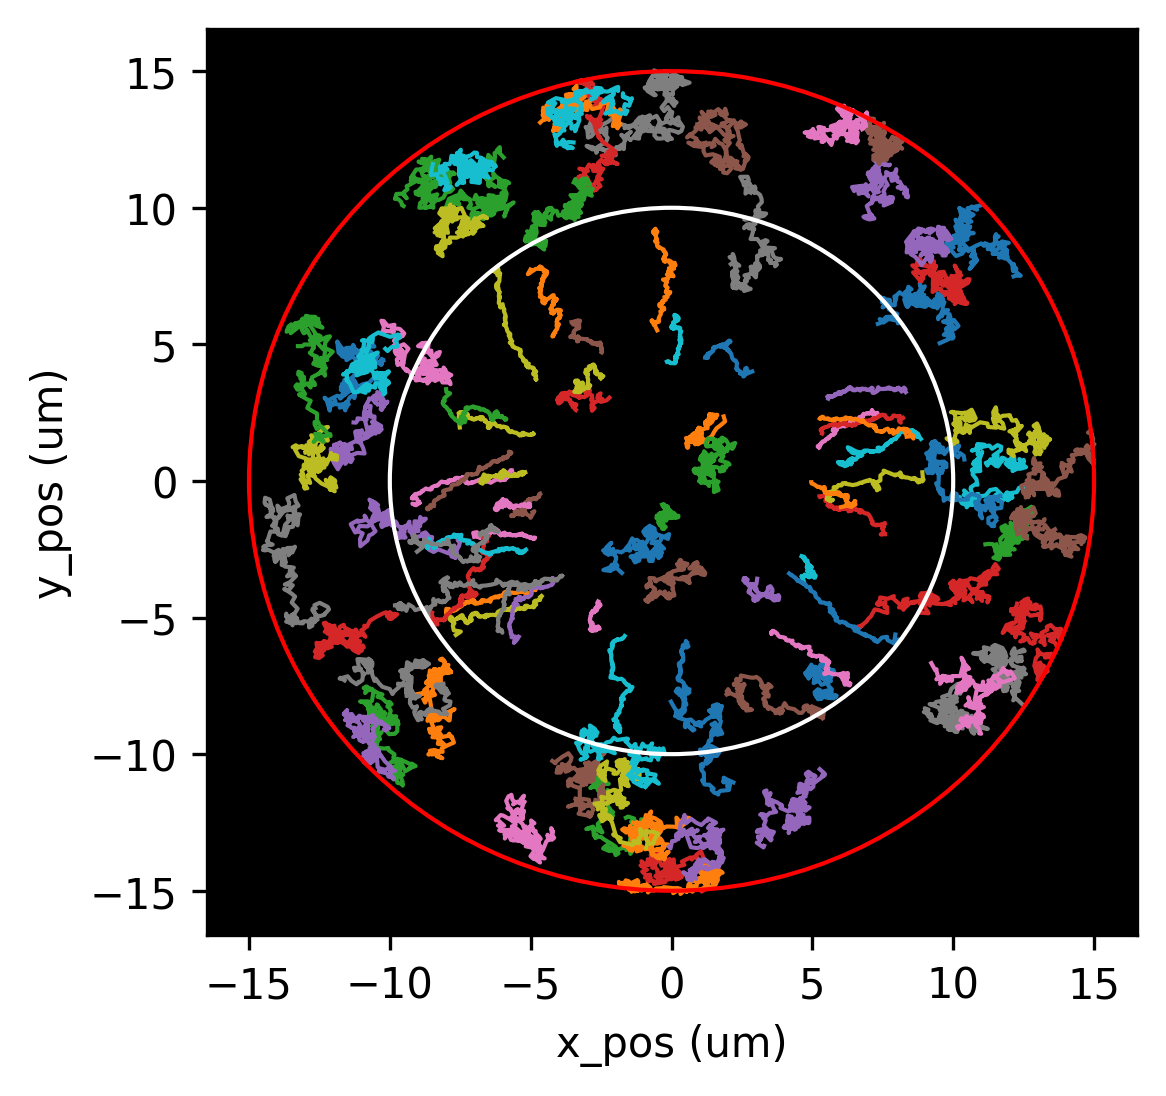

In [137]:
activation_circle = patches.Circle((0,0),10,fill=False, color = 'w',zorder=1001)
boundary_circle = patches.Circle((0,0),15,fill=False, color = 'r',zorder=1001)

fig, ax = plt.subplots(dpi = 300, figsize = (4,4))
ax.set_facecolor('k')

ax.add_patch(activation_circle)
ax.add_patch(boundary_circle)
ax.plot(fibers[:,:100,3],fibers[:,:100,4], linewidth = 1);
ax.set(xlabel = 'x_pos (um)', ylabel = 'y_pos (um)')


[Text(0.5, 0, 'x_pos (um)'), Text(0, 0.5, 'y_pos (um)')]

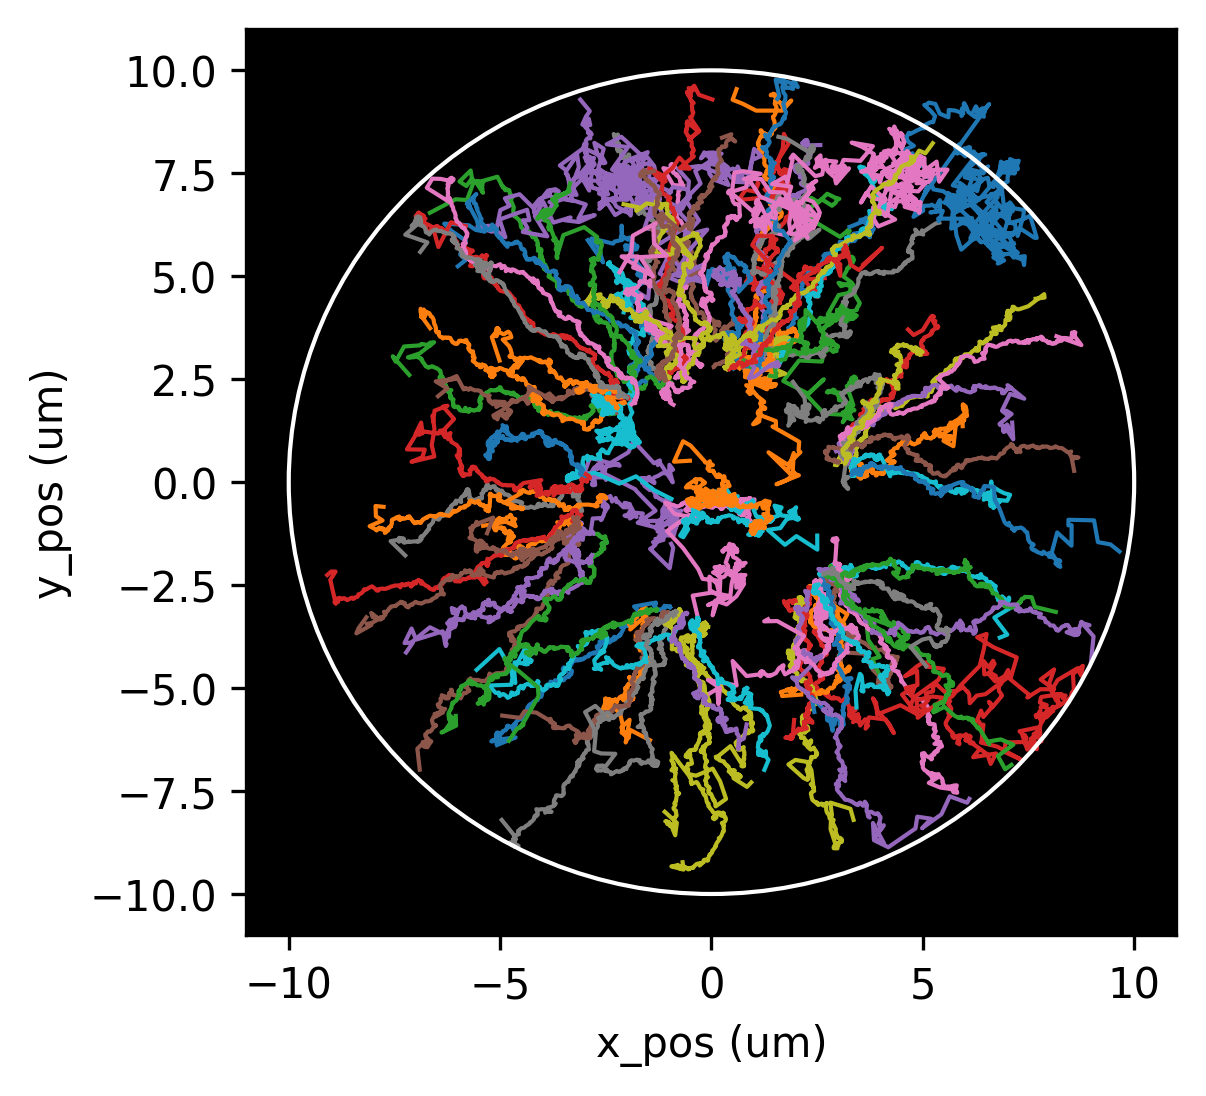

In [138]:
circle = patches.Circle((0,0),10,fill=False, color = 'w',zorder=1001)


fig, ax = plt.subplots(dpi = 300, figsize = (4,4))
ax.set_facecolor('k')

ax.plot(ilid_micro2[:,:100,3],ilid_micro2[:,:100,4], '-', linewidth = 1);
ax.add_patch(circle)
ax.set(xlabel = 'x_pos (um)', ylabel = 'y_pos (um)')

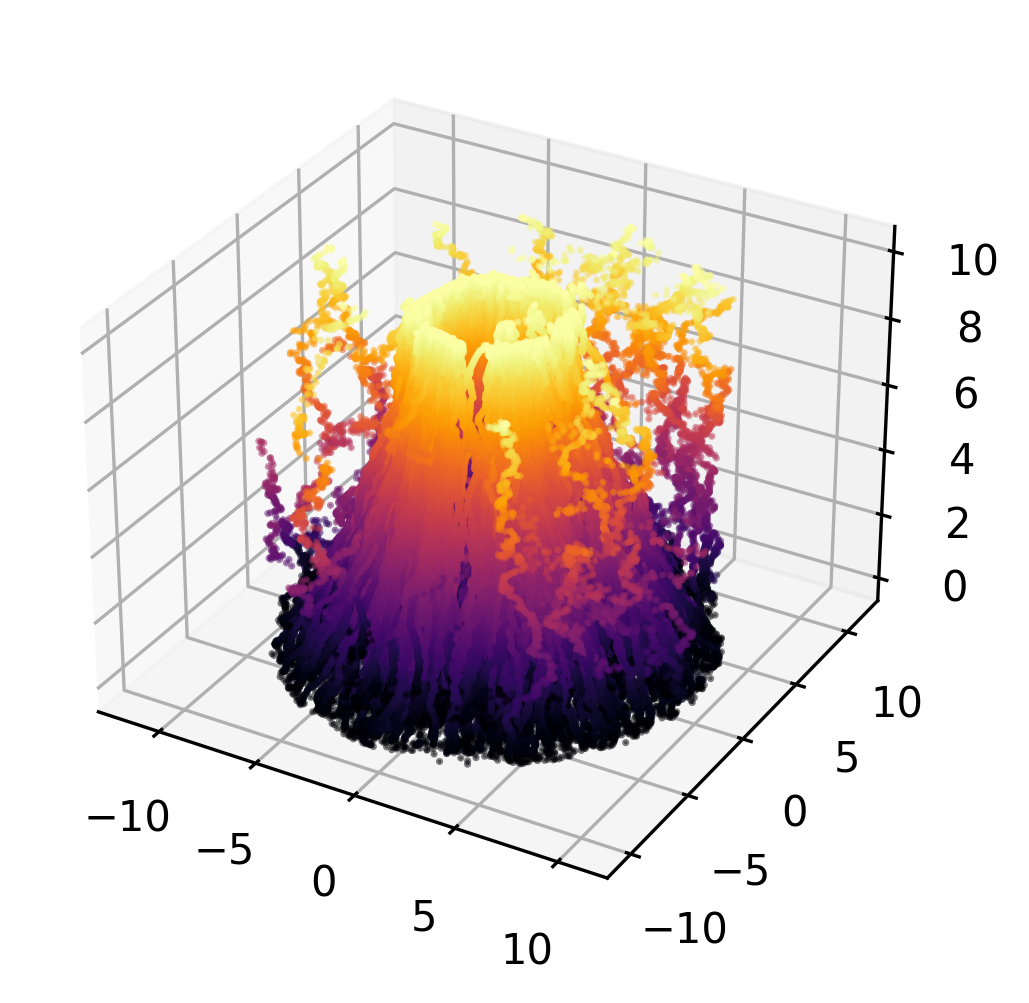

In [145]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(4, 4)

for x in range(1000):
    ax.scatter(ilid_micro2[:,x,3], ilid_micro2[:,x,4], time, c=time, alpha = 0.5, s = 0.5, cmap = 'inferno')